In [27]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wcrossb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/wcrossb/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
data = pd.read_csv("train_dat/training_set.csv", lineterminator='\n')
#print(data.shape)
data = data[data.type > 1]
data = data.reset_index(drop=True)
print(data.shape)
data.head()



(716, 3)


,date,type,tweet\r
0,2016-01-21 06:05:44,3.0,"China Crash to Trigger ‘Financial Ice Age,’ Gl..."
1,2016-01-25 01:04:20,3.0,Australia National Australia Bank's Business C...
2,2016-01-28 14:00:41,3.0,"""where's mom"" ""died alrdy"" erm bitch she ur wi..."
3,2016-01-29 07:27:36,3.0,Manufacturing production growth in Austria acc...
4,2016-01-29 16:39:59,3.0,".@martha_j_bailey, @dynarski look at associati..."


In [36]:
# Tweet text preprocessing...

import json
import collections
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from nltk.tokenize import TweetTokenizer
def text_preprocess(text, tknzr):
    FLAGS = re.MULTILINE | re.DOTALL
    # Different regex parts for smiley faces
    eyes = r"[8:=;]"
    nose = r"['`-]?"
    # function so code less repetitive
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)
    text = re_sub(r"https?://S+b|www.(w+.)+S*", "")
    text = re_sub(r"/"," / ")
    text = re_sub(r"@w+", "")
    text = re_sub(r"{}{}[)dD]+|[)dD]+{}{}".format(eyes, nose, nose, eyes), "")
    text = re_sub(r"{}{}p+".format(eyes, nose), "")
    #text = re_sub(r"{}{}(+|)+{}{}".format(eyes, nose, nose, eyes), "")
    text = re_sub(r"{}{}[/|l*]".format(eyes, nose), "")
    text = re_sub(r"<3","")
    text = re_sub(r"[-+]?[.d]*[d]+[:,.d]*", "")
    text = re_sub(r"([!?.]){2,}", r"1 ")
    text = re_sub(r"b(S*?)(.)2{2,}b", r"12 ")
    text = re_sub(r"[A-Za-z]+[@#$%^&*()]+[A-Za-z]*","abuse")
    tokens = tknzr.tokenize(text.lower())
    return tokens #" ".join(tokens)

tknzr=TweetTokenizer(reduce_len=True, preserve_case=False, strip_handles=False)

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.type)
data['categorical_label'] = le.transform(data.type)
data.head()

,date,type,tweet\r,categorical_label
0,2016-01-21 06:05:44,3.0,"China Crash to Trigger ‘Financial Ice Age,’ Gl...",1
1,2016-01-25 01:04:20,3.0,Australia National Australia Bank's Business C...,1
2,2016-01-28 14:00:41,3.0,"""where's mom"" ""died alrdy"" erm bitch she ur wi...",1
3,2016-01-29 07:27:36,3.0,Manufacturing production growth in Austria acc...,1
4,2016-01-29 16:39:59,3.0,".@martha_j_bailey, @dynarski look at associati...",1


In [43]:
X = []
Y = []
for idx in data.index:
  X.append(text_preprocess(data['tweet\r'][idx], tknzr))
  Y.append(data['categorical_label'][idx])
# Train-Test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
labels = ['Negative','Neutral']  # For further use...
print(Y_train)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# This utility function will be used to evaluate the other models also.
def show_performance_data(Y_test, Y_pred, model_name):
  print(classification_report(Y_test, Y_pred, target_names=labels))
  tmp_result = classification_report(Y_test, Y_pred, target_names=labels, output_dict=True)
  cm1 = confusion_matrix(Y_test, Y_pred)
  df_cm = pd.DataFrame(cm1, index = [i for i in labels], columns = [i for i in labels])
  plt.figure(figsize = (7,5))
  sn.heatmap(df_cm, annot=True,cmap='gist_earth_r', fmt='g')
  plt.savefig('confusion_mrtx_'+model_name+'.png',bbox_inches = 'tight')
  return tmp_result



In [57]:
import os
from gensim.corpora import Dictionary
import gensim
from gensim.matutils import cossim
topic = 15
Lda = gensim.models.ldamodel.LdaModel
dictionary = Dictionary(X_train)
train_corpus = [dictionary.doc2bow(doc) for doc in X_train]
model = Lda(corpus=train_corpus, id2word=dictionary, num_topics=topic)
test_corpus = [dictionary.doc2bow(doc) for doc in X_test]
train_x_topics, test_x_topics = [], []
# Convert text data into topic vectors
for t in train_corpus:
  train_x_topics.append(model[t])
for t in test_corpus:
  test_x_topics.append(model[t])
# Prediction
Y_pred = []
for i in range(len(test_x_topics)):
  tst = test_x_topics[i]
  sim = [cossim(tst, tr_t) for tr_t in train_x_topics]
  idx = np.array(sim).argsort()[-1]
  Y_pred.append(Y_train[idx])

              precision    recall  f1-score   support

    Negative       0.29      0.17      0.22        69
     Neutral       0.67      0.79      0.73       146

    accuracy                           0.60       215
   macro avg       0.48      0.48      0.47       215
weighted avg       0.55      0.60      0.56       215



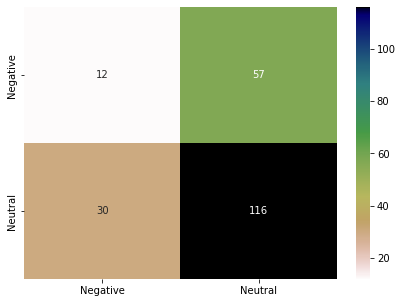

In [58]:
result_lda = show_performance_data(Y_test, Y_pred, 'lda')


/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_96445/2946354389.py:9: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model.docvecs.most_similar(positive = [test_doc_vector])


              precision    recall  f1-score   support

    Negative       0.26      0.17      0.21        69
     Neutral       0.66      0.77      0.71       146

    accuracy                           0.58       215
   macro avg       0.46      0.47      0.46       215
weighted avg       0.53      0.58      0.55       215



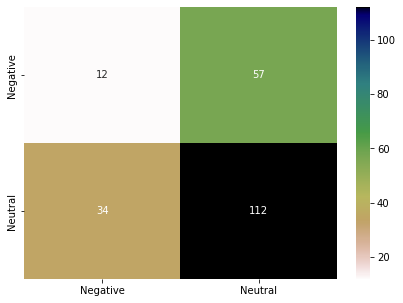

In [60]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
vec = 100
tagged_corpus = [TaggedDocument(d, [i]) for i, d in enumerate(X_train)]
model = Doc2Vec(tagged_corpus, vector_size=vec, window=3, dm=1, min_count=1, workers=4)
Y_pred = []
for a in X_test:
  test_doc_vector = model.infer_vector(a)
  sims = model.docvecs.most_similar(positive = [test_doc_vector])
  Y_pred.append(Y_train[sims[0][0]])
result_doc2vec = show_performance_data(Y_test, Y_pred, 'doc2vec')

NameError: name 'train_vectors' is not defined